In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
## 1-(a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hinge_loss
from sklearn.metrics import accuracy_score

train_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.data', sep = '\s+', header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.labels', sep = '\s+', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.data', sep = '\s+', header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.labels', sep = '\s+', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

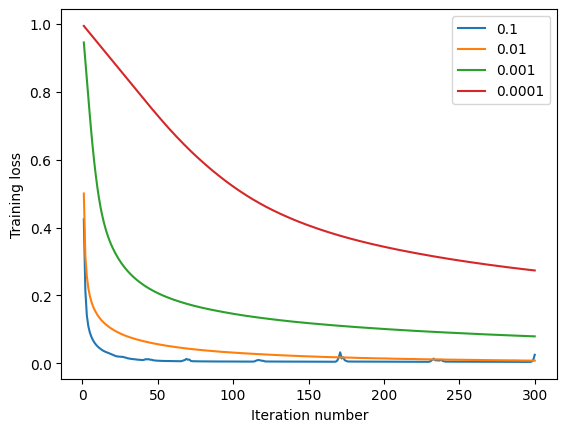

In [3]:
xy = np.multiply(train_label.to_numpy(), train_data)
lrate = [1e-1, 1e-2, 1e-3, 1e-4]
loss = np.zeros((300, 4))
train_mis = []
test_mis = []
train_scores = np.zeros((4, train_data.shape[0]))
test_scores = np.zeros((4, test_data.shape[0]))
for j, lr in enumerate(lrate):
  w = np.zeros((train_data.shape[1], 1)).ravel()
  for i in range(300):
    wxy = np.matmul(xy, w)
    fdw = -xy.copy()
    fdw[wxy >= 1] = 0
    ldw = np.mean(fdw, axis = 0) + 2 * 0.01 * w
    w = w - lr * ldw
    loss[i, j] = hinge_loss(train_label, np.matmul(train_data, w)) + 0.01 * np.matmul(w, w)
  model = LogisticRegression(fit_intercept = False).fit(train_data, train_label.values.ravel()) # Initialization of the model. No further meaning
  model.coef_ = w
  train_mis.append(1 - accuracy_score(model.predict(train_data), train_label))
  test_mis.append(1 - accuracy_score(model.predict(test_data), test_label))
  train_scores[j, :] = model.predict_proba(train_data)[:, 1].ravel()
  test_scores[j, :] = model.predict_proba(test_data)[:, 1].ravel()
for i in range(4):
  plt.plot(np.arange(1, 301), loss[:, i])
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.legend([str(x) for x in lrate])
plt.show()

In [4]:
print(pd.DataFrame({'Learning rate' : lrate, 'Training misc. error' : train_mis, 'Test misc. error' : test_mis}))

   Learning rate  Training misc. error  Test misc. error
0         0.1000              0.000167             0.030
1         0.0100              0.001167             0.021
2         0.0010              0.016667             0.025
3         0.0001              0.064833             0.069


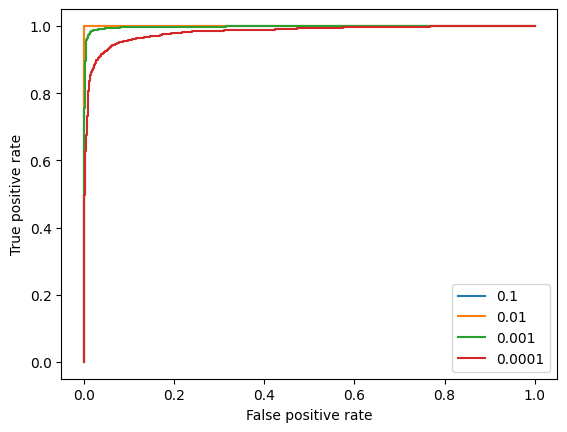

In [5]:
from sklearn.metrics import roc_curve

for i in range(4):
  fpr, tpr, thresholds = roc_curve(train_label, train_scores[i, :])
  plt.plot(fpr, tpr)
plt.legend([str(x) for x in lrate])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

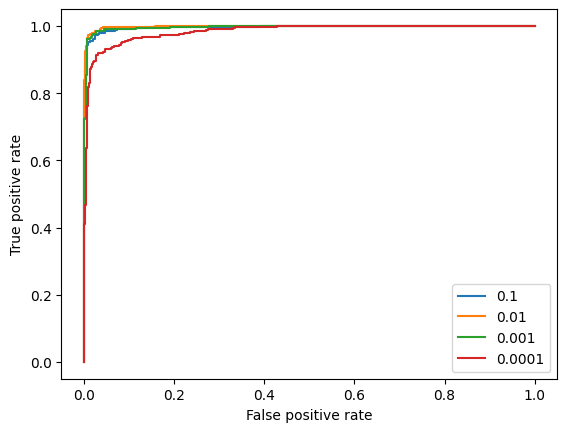

In [6]:
for i in range(4):
  fpr, tpr, thresholds = roc_curve(test_label, test_scores[i, :])
  plt.plot(fpr, tpr)
plt.legend([str(x) for x in lrate])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [7]:
## 1-(b)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.data', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.labels', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.data', sep = "\s+", header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.labels', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

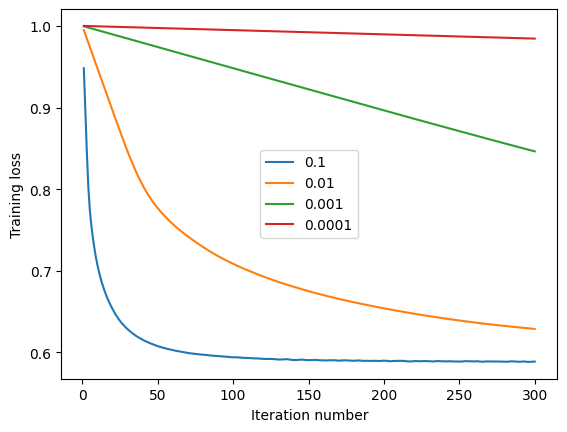

In [8]:
xy = np.multiply(train_label.to_numpy(), train_data)
lrate = [1e-1, 1e-2, 1e-3, 1e-4]
loss = np.zeros((300, 4))
train_mis = []
test_mis = []
train_scores = np.zeros((4, train_data.shape[0]))
test_scores = np.zeros((4, test_data.shape[0]))
for j, lr in enumerate(lrate):
  w = np.zeros((train_data.shape[1], 1)).ravel()
  for i in range(300):
    wxy = np.matmul(xy, w)
    fdw = -xy.copy()
    fdw[wxy >= 1] = 0
    ldw = np.mean(fdw, axis = 0) + 2 * 0.01 * w
    w = w - lr * ldw
    loss[i, j] = hinge_loss(train_label, np.matmul(train_data, w)) + 0.01 * np.matmul(w, w)
  model = LogisticRegression(fit_intercept = False).fit(train_data, train_label.values.ravel()) # Initialization of the model. No further meaning
  model.coef_ = w
  train_mis.append(1 - accuracy_score(model.predict(train_data), train_label))
  test_mis.append(1 - accuracy_score(model.predict(test_data), test_label))
  train_scores[j, :] = model.predict_proba(train_data)[:, 1].ravel()
  test_scores[j, :] = model.predict_proba(test_data)[:, 1].ravel()
for i in range(4):
  plt.plot(np.arange(1, 301), loss[:, i])
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.legend([str(x) for x in lrate])
plt.show()

In [9]:
print(pd.DataFrame({'Learning rate' : lrate, 'Training misc. error' : train_mis, 'Test misc. error' : test_mis}))

   Learning rate  Training misc. error  Test misc. error
0         0.1000                0.2355          0.435000
1         0.0100                0.2750          0.421667
2         0.0010                0.3485          0.415000
3         0.0001                0.3480          0.416667


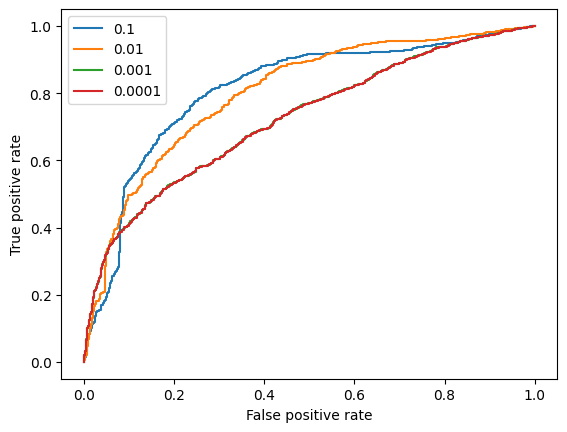

In [10]:
for i in range(4):
  fpr, tpr, thresholds = roc_curve(train_label, train_scores[i, :])
  plt.plot(fpr, tpr)
plt.legend([str(x) for x in lrate])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

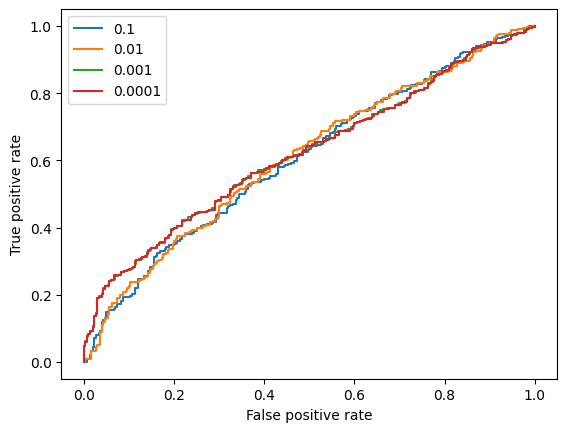

In [11]:
for i in range(4):
  fpr, tpr, thresholds = roc_curve(test_label, test_scores[i, :])
  plt.plot(fpr, tpr)
plt.legend([str(x) for x in lrate])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [12]:
## 1-(c)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_train.csv', header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_train.labels', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_valid.csv', header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_valid.labels', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

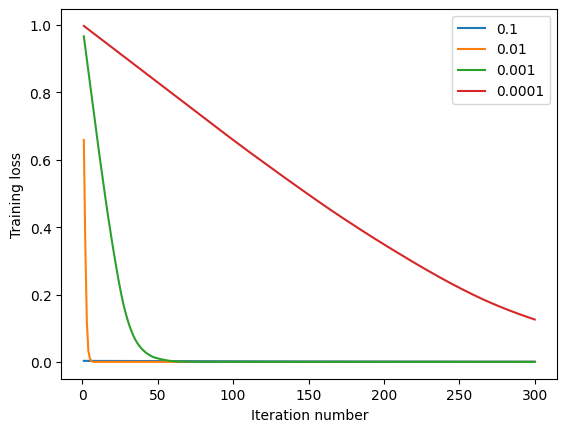

In [13]:
xy = np.multiply(train_label.to_numpy(), train_data)
lrate = [1e-1, 1e-2, 1e-3, 1e-4]
loss = np.zeros((300, 4))
train_mis = []
test_mis = []
train_scores = np.zeros((4, train_data.shape[0]))
test_scores = np.zeros((4, test_data.shape[0]))
for j, lr in enumerate(lrate):
  w = np.zeros((train_data.shape[1], 1)).ravel()
  for i in range(300):
    wxy = np.matmul(xy, w)
    fdw = -xy.copy()
    fdw[wxy >= 1] = 0
    ldw = np.mean(fdw, axis = 0) + 2 * 0.01 * w
    w = w - lr * ldw
    loss[i, j] = hinge_loss(train_label, np.matmul(train_data, w)) + 0.01 * np.matmul(w, w)
  model = LogisticRegression(fit_intercept = False).fit(train_data, train_label.values.ravel()) # Initialization of the model. No further meaning
  model.coef_ = w
  train_mis.append(1 - accuracy_score(model.predict(train_data), train_label))
  test_mis.append(1 - accuracy_score(model.predict(test_data), test_label))
  train_scores[j, :] = model.predict_proba(train_data)[:, 1].ravel()
  test_scores[j, :] = model.predict_proba(test_data)[:, 1].ravel()
for i in range(4):
  plt.plot(np.arange(1, 301), loss[:, i])
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.legend([str(x) for x in lrate])
plt.show()

In [14]:
print(pd.DataFrame({'Learning rate' : lrate, 'Training misc. error' : train_mis, 'Test misc. error' : test_mis}))

   Learning rate  Training misc. error  Test misc. error
0         0.1000                   0.0          0.153333
1         0.0100                   0.0          0.123333
2         0.0010                   0.0          0.136667
3         0.0001                   0.0          0.146667


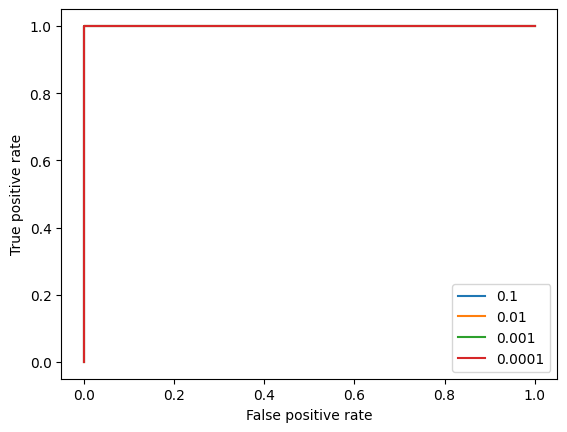

In [15]:
for i in range(4):
  fpr, tpr, thresholds = roc_curve(train_label, train_scores[i, :])
  plt.plot(fpr, tpr)
plt.legend([str(x) for x in lrate])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

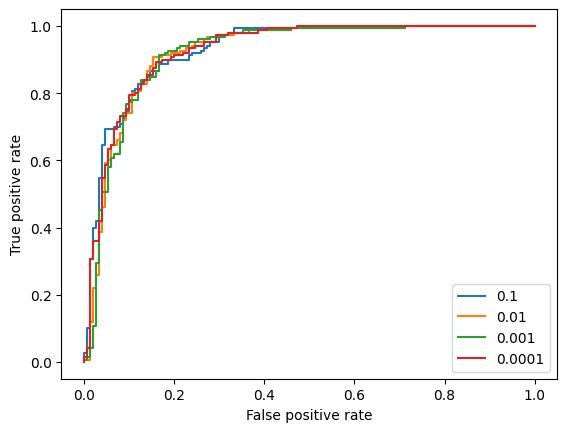

In [16]:
for i in range(4):
  fpr, tpr, thresholds = roc_curve(test_label, test_scores[i, :])
  plt.plot(fpr, tpr)
plt.legend([str(x) for x in lrate])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [17]:
## 1-(d)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.data', sep = '\s+', header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.labels', sep = '\s+', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.data', sep = '\s+', header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.labels', sep = '\s+', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

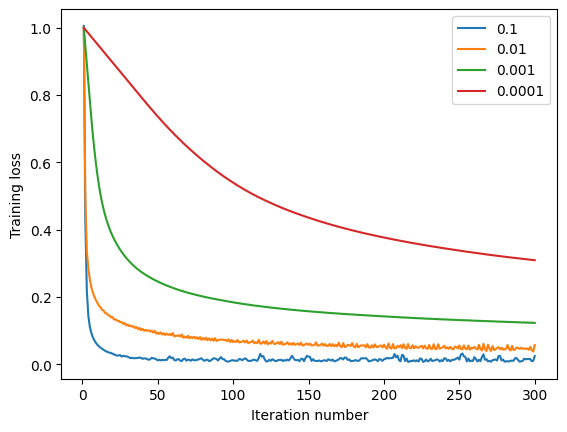

In [61]:
xy = np.multiply(train_label.to_numpy(), train_data)
lrate = [1e-1, 1e-2, 1e-3, 1e-4]
loss = np.zeros((300, 4))
train_mis = []
test_mis = []
train_scores = np.zeros((4, train_data.shape[0]))
test_scores = np.zeros((4, test_data.shape[0]))
for j, lr in enumerate(lrate):
  w = np.zeros((train_data.shape[1], 1)).ravel()
  for i in range(300):
    wxy = np.matmul(xy, w)
    fdw = (1.1 - wxy).reshape(-1,1) * xy / 0.2
    fdw[wxy >= 1.1] = 0
    fdw[wxy <= 0.9] = -xy[wxy <= 0.9]
    ldw = np.mean(fdw, axis = 0) + 2 * 0.01 * w
    w = w - lr * ldw
    L = ((1.1 - wxy)**2).reshape(-1,1) / 0.4
    L[wxy >= 1.1] = 0
    L[wxy <= 0.9] = 1 - wxy[wxy <= 0.9].reshape(-1, 1)
    loss[i, j] = np.mean(L) + 0.01 * np.matmul(w, w)
  model = LogisticRegression(fit_intercept = False).fit(train_data, train_label.values.ravel()) # Initialization of the model. No further meaning
  model.coef_ = w
  train_mis.append(1 - accuracy_score(model.predict(train_data), train_label))
  test_mis.append(1 - accuracy_score(model.predict(test_data), test_label))
  train_scores[j, :] = model.predict_proba(train_data)[:, 1].ravel()
  test_scores[j, :] = model.predict_proba(test_data)[:, 1].ravel()
for i in range(4):
  plt.plot(np.arange(1, 301), loss[:, i])
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.legend([str(x) for x in lrate])
plt.show()

In [62]:
print(pd.DataFrame({'Learning rate' : lrate, 'Training misc. error' : train_mis, 'Test misc. error' : test_mis}))

   Learning rate  Training misc. error  Test misc. error
0         0.1000              0.000500             0.034
1         0.0100              0.001500             0.026
2         0.0010              0.013833             0.022
3         0.0001              0.059833             0.068
